In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [20]:
idx_7 = np.where(np.argmax(mnist.train.labels, axis=1)==7)
idx_9 = np.where(np.argmax(mnist.train.labels, axis=1)==9)
image_7 = mnist.train.images[idx_7]
image_9 = mnist.train.images[idx_9]
x = np.eye(2)[np.random.randint(2)]

print(len(idx_7[0]))
print(image_7.shape)
print(x, x[-1])

5715
(5715, 784)
[0. 1.] 1.0


In [17]:
def batch_maker(n_batch):
    image = []
    label = []
    for i in range(n_batch):
        label.append(np.eye(2)[np.random.randint(2)])
        if np.argmax(label[-1])==0:
            idx_rand = np.random.randint(len(idx_7[0]))
            image.append(image_7[idx_rand])
        else:
            idx_rand = np.random.randint(len(idx_9[0]))
            image.append(image_9[idx_rand])
    return np.array(image), np.array(label)

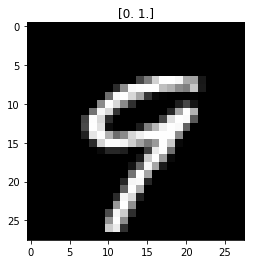

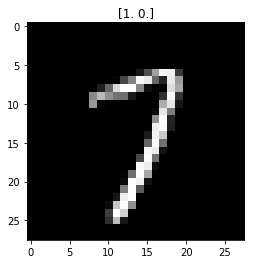

(2, 784)
[[0. 1.]
 [1. 0.]]


In [50]:
image, label = batch_maker(2)
plt.imshow(image[0].reshape(28,28), 'gray')
plt.title(label[0])
plt.show()

image, label = batch_maker(2)
plt.imshow(image[1].reshape(28,28), 'gray')
plt.title(label[1])
plt.show()

print(image.shape)
print(label)

In [27]:
input_h = 28 # Input height
input_w = 28 # Input width
input_ch = 1 # Input channel : Gray scale
# (None, 28, 28, 1)

## First convolution layer
# Filter size
k1_h = 3
k1_w = 3
# the number of channels
k1_ch = 32
# Pooling size
p1_h = 2
p1_w = 2
# (None, 14, 14 ,32)

## Second convolution layer
# Filter size
k2_h = 3
k2_w = 3
# the number of channels
k2_ch = 64
# Pooling size
p2_h = 2
p2_w = 2
# (None, 7, 7 ,64)

n_output = 2

In [28]:
weights = {
    'conv1' : tf.Variable(tf.random_normal([k1_h, k1_w, input_ch, k1_ch],stddev = 0.1)),
    'conv2' : tf.Variable(tf.random_normal([k2_h, k2_w, k1_ch, k2_ch],stddev = 0.1)),
    'output' : tf.Variable(tf.random_normal([k2_ch, n_output], stddev = 0.1))
}

biases = {
    'conv1' : tf.Variable(tf.random_normal([k1_ch], stddev = 0.1)),
    'conv2' : tf.Variable(tf.random_normal([k2_ch], stddev = 0.1))
}

x = tf.placeholder(tf.float32, [None, input_h, input_w, input_ch])
y = tf.placeholder(tf.float32, [None, n_output])

In [29]:
# Define Network
def net(x, weights, biases):
    ## First convolution layer
    conv1 = tf.nn.conv2d(x, weights['conv1'], 
                         strides= [1, 1, 1, 1], 
                         padding = 'SAME')
    conv1 = tf.nn.relu(tf.add(conv1, biases['conv1']))
    maxp1 = tf.nn.max_pool(conv1, 
                           ksize = [1, p1_h, p1_w, 1], 
                           strides = [1, p1_h, p1_w, 1], 
                           padding = 'VALID')
    
    ## Second convolution layer
    conv2 = tf.nn.conv2d(maxp1, weights['conv2'], 
                         strides= [1, 1, 1, 1], 
                         padding = 'SAME')
    conv2 = tf.nn.relu(tf.add(conv2, biases['conv2']))
    maxp2 = tf.nn.max_pool(conv2, 
                           ksize = [1, p2_h, p2_w, 1], 
                           strides = [1, p2_h, p2_w, 1], 
                           padding = 'VALID')

    ## global average pooling
    temp = tf.reduce_mean(maxp2, (1,2))
    output = tf.matmul(temp, weights['output'])

    return maxp2, output

In [30]:
LR = 1e-4

features, pred = net(x, weights, biases)
loss = tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = pred)
loss = tf.reduce_mean(loss)

optm = tf.train.AdamOptimizer(LR).minimize(loss)

init = tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [31]:
n_batch = 50
n_iter = 5000
n_prt = 250

In [32]:
sess = tf.Session()
sess.run(init)

In [33]:
for epoch in range(n_iter):
    train_x, train_y = batch_maker(n_batch)
    train_x = np.reshape(train_x, [-1, input_h, input_w, input_ch])
    sess.run(optm, feed_dict = {x: train_x, y :train_y})
    
    if epoch % n_prt ==0:
        cost = sess.run(loss, feed_dict = {x:train_x, y: train_y})
        print("Iter : {0}\t| Cost : {1}".format(epoch, cost))

Iter : 0	| Cost : 0.7000898718833923
Iter : 250	| Cost : 0.6860048174858093
Iter : 500	| Cost : 0.668547511100769
Iter : 750	| Cost : 0.6419272422790527
Iter : 1000	| Cost : 0.5970175862312317
Iter : 1250	| Cost : 0.5483651757240295
Iter : 1500	| Cost : 0.4916606545448303
Iter : 1750	| Cost : 0.4592135548591614
Iter : 2000	| Cost : 0.39276379346847534
Iter : 2250	| Cost : 0.3424724340438843
Iter : 2500	| Cost : 0.30359339714050293
Iter : 2750	| Cost : 0.29824891686439514
Iter : 3000	| Cost : 0.32496169209480286
Iter : 3250	| Cost : 0.2228565663099289
Iter : 3500	| Cost : 0.1941295862197876
Iter : 3750	| Cost : 0.2588551938533783
Iter : 4000	| Cost : 0.20258930325508118
Iter : 4250	| Cost : 0.17404751479625702
Iter : 4500	| Cost : 0.24953210353851318
Iter : 4750	| Cost : 0.20386703312397003


In [52]:
test_x, test_y = batch_maker(100)

test_x = np.reshape(test_x, [-1, input_h, input_w, input_ch])
test_y = np.array(test_y)

my_pred = sess.run(pred, feed_dict = {x: test_x})
my_pred = np.argmax(my_pred, axis = 1)

labels = np.argmax(test_y, axis = 1)

accr = np.mean(np.equal(my_pred, labels))
print("Accuracy : {0} %".format(accr*100))

Accuracy : 91.0 %


[[-1.118169   1.8887715]]
(1, 7, 7, 2)
(7, 7)


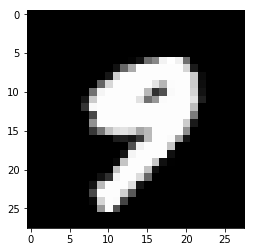

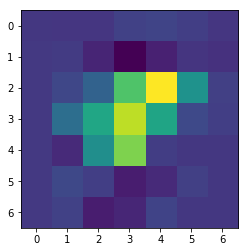

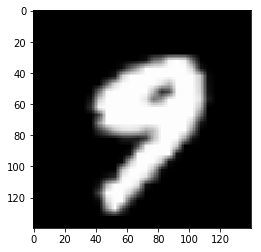

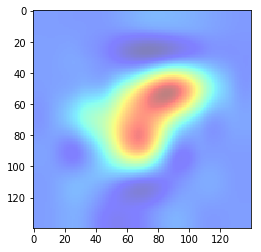

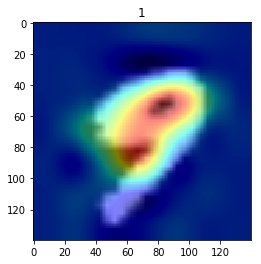

In [48]:
test_x, test_y = batch_maker(1)
test_x = np.reshape(test_x, [-1, input_h, input_w, input_ch])
predict, feature, w = sess.run((pred, features, weights['output']), feed_dict = {x: test_x})
print(predict)

attention = np.matmul(feature, w)
attention_show  = attention[:, :, :, np.argmax(predict, axis = 1)].reshape(7,7)
print(attention.shape)
print(attention_show.shape)

plt.imshow(test_x.reshape(28,28), 'gray')
plt.show()
plt.imshow(attention_show)
plt.show()

larg_test_x = cv2.resize(test_x.reshape(28,28), (28*5, 28*5))
large_attention = cv2.resize(attention_show, (28*5, 28*5), interpolation = cv2.INTER_CUBIC)

plt.imshow(larg_test_x, 'gray')
plt.show()

plt.imshow(large_attention, 'jet', alpha = 0.5)
plt.show()

plt.imshow(larg_test_x, 'gray')
plt.imshow(large_attention, 'jet', alpha = 0.5)
plt.title(np.argmax(predict))
plt.show()